In [33]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])

if module_path not in sys.path:
    sys.path.append(module_path)

In [34]:
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('../data/processed/HotelReservationsLabelP.csv')

def classify_price(price):
    if price == 1:
        return 0.0
    elif price == 2:
        return 1.0
    else:
        return 2.0

df['label_avg_price_per_room'] = df['label_avg_price_per_room'].apply(classify_price)
df.head()

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,no_of_special_requests,no_total_people,no_total_nights,season_group
0,0.0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,0,2,3,Autumn
1,1.0,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,1,2,5,Autumn
2,0.0,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,0,1,3,Winter
3,1.0,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,0,2,2,Spring
4,1.0,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,0,2,2,Spring


In [35]:
from scripts import data_preprocess
# Definir a coluna alvo
target_column = 'label_avg_price_per_room'

# Pré-processamento dos dados
preprocessor, X, y = data_preprocess.preprocess(df, target_column)

X_prep = preprocessor.fit_transform(X)
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)

feature_names = list(numeric_features) + list(categorical_feature_names)
X_df = pd.DataFrame(X_prep, columns=feature_names)
X_df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter
0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3.0,0.0,2.0,6.0,0.0,85.0,2018.0,8.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36271,2.0,0.0,1.0,3.0,0.0,228.0,2018.0,10.0,17.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36272,2.0,0.0,2.0,6.0,0.0,148.0,2018.0,7.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36273,2.0,0.0,0.0,3.0,0.0,63.0,2018.0,4.0,21.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [36]:
y_df = y.reset_index(drop=True).to_frame()

final_df = pd.concat([y_df, X_df], axis=1)
final_df.rename(columns={0: 'label_avg_price_per_room'}, inplace=True)
final_df

,label_avg_price_per_room,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,...,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,season_group_Autumn,season_group_Spring,season_group_Summer,season_group_Winter
0,0.0,2.0,0.0,1.0,2.0,0.0,224.0,2017.0,10.0,2.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,2.0,0.0,2.0,3.0,0.0,5.0,2018.0,11.0,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,2.0,1.0,0.0,1.0,2018.0,2.0,28.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,2.0,0.0,0.0,2.0,0.0,211.0,2018.0,5.0,20.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,2.0,0.0,1.0,1.0,0.0,48.0,2018.0,4.0,11.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,2.0,3.0,0.0,2.0,6.0,0.0,85.0,2018.0,8.0,3.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36271,1.0,2.0,0.0,1.0,3.0,0.0,228.0,2018.0,10.0,17.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
36272,1.0,2.0,0.0,2.0,6.0,0.0,148.0,2018.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
36273,1.0,2.0,0.0,0.0,3.0,0.0,63.0,2018.0,4.0,21.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [37]:
df_target = final_df['label_avg_price_per_room']
df_feat = final_df.drop(columns='label_avg_price_per_room')

In [38]:
X = np.array(df_feat).astype('float32')
y = np.array(df_target).astype('float32')

In [39]:
y = y.reshape(-1, 1)
y.shape

(36275, 1)

In [40]:
from sklearn.model_selection import train_test_split
from scripts import data_oversampler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_resampled, y_resampled = data_oversampler.oversample(X_train, y_train)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [41]:
X_train

array([[2., 0., 1., ..., 0., 1., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 1., 0., 0.],
       ...,
       [3., 0., 2., ..., 0., 0., 0.],
       [2., 0., 0., ..., 1., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [42]:
train_data = pd.DataFrame({'Target': y_train[:,0]})
for i in range(X_train.shape[1]):
    train_data[i] = X_train[:,i]

In [43]:
train_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,1.0,2.0,0.0,1.0,2.0,0.0,59.0,2018.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,18.0,2018.0,11.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,2.0,2.0,0.0,0.0,3.0,0.0,35.0,2018.0,3.0,24.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2.0,1.0,2.0,1.0,1.0,0.0,18.0,2018.0,7.0,23.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.0,1.0,0.0,0.0,2.0,0.0,188.0,2018.0,6.0,15.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [44]:
val_data = pd.DataFrame({'Target': y_val[:,0]})
for i in range(X_val.shape[1]):
    val_data[i] = X_val[:,i]

In [45]:
val_data.head()

,Target,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,1.0,2.0,0.0,2.0,1.0,0.0,44.0,2018.0,4.0,23.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,2.0,0.0,1.0,2.0,0.0,162.0,2017.0,9.0,4.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,0.0,8.0,2018.0,3.0,8.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,2.0,1.0,0.0,1.0,2.0,0.0,21.0,2018.0,11.0,7.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,3.0,0.0,204.0,2018.0,5.0,5.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [46]:
train_data.to_csv('../data/processed/train.csv', header=False, index=False)
val_data.to_csv('../data/processed/validation.csv', header=False, index=False)

In [15]:
import boto3
import sagemaker
from dotenv import load_dotenv
import os

load_dotenv()

role = os.getenv('SAGEMAKER_ROLE')
print(sagemaker.__version__)
print(boto3.__version__)
print(role)

sagemaker.config INFO - Not applying SDK defaults from location: C:\ProgramData\sagemaker\sagemaker\config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: C:\Users\pedro\AppData\Local\sagemaker\sagemaker\config.yaml
2.224.0
1.34.131
arn:aws:iam::590183673270:role/service-role/AmazonSageMaker-ExecutionRole-20240613T170549


In [16]:
bucket = os.getenv('BUCKET')
model_subfolder = os.getenv('MODEL_SUBFOLDER')
dataset_subfolder = os.getenv('DATASET_SUBFOLDER')
key_train = os.getenv('KEY_TRAIN')
key_test = os.getenv('KEY_TEST')
output_location = os.getenv('OUTPUT_LOCATION')
s3_train_data = os.getenv('S3_TRAIN_DATA')
s3_test_data = os.getenv('S3_TEST_DATA')

print(f'Modelo final: {output_location}')

Modelo final: s3://mysagemakerprojectbucket/models/hotel-reservations/xgboost/output


In [17]:
boto3.Session().region_name

'us-east-1'

In [18]:
with open('../data/processed/train.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(dataset_subfolder, 'train', key_train).replace('\\', '/')).upload_fileobj(f)

In [19]:
with open('../data/processed/validation.csv', 'rb') as f:
    boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(dataset_subfolder, 'test', key_test).replace('\\', '/')).upload_fileobj(f)

In [20]:
from sagemaker import image_uris
session = sagemaker.Session(boto3.Session())
container = image_uris.retrieve(framework='xgboost', region=boto3.Session().region_name, version='1.7-1')

In [21]:
from sagemaker.inputs import TrainingInput

train_input = TrainingInput(s3_data=s3_train_data, content_type='csv', s3_data_type='S3Prefix')
validation_input = TrainingInput(s3_data=s3_test_data, content_type='csv', s3_data_type='S3Prefix')

data_channels = {'train': train_input, 'validation': validation_input}
data_channels

xgboost = sagemaker.estimator.Estimator(
    image_uri=container,
    role=role,
    instance_count=1,
    instance_type='ml.m4.xlarge',
    sagemaker_session=session,
    output_path=output_location,
    #use_spot_instances=True,
    #max_wait=7200,
    #max_run=3600,
    hyperparameters= {
        'objective': 'multi:softmax',
        'num_class': 3,
        'num_round': 562,
        'max_depth': 25,
        'subsample': 0.7764,
        'colsample_bytree': 0.9289,
        'eta': 0.0182
    }
)

In [22]:
xgboost.fit(data_channels)

INFO:sagemaker:Creating training-job with name: sagemaker-xgboost-2024-06-23-22-05-15-067


2024-06-23 22:05:15 Starting - Starting the training job...
2024-06-23 22:05:45 Starting - Preparing the instances for training......
2024-06-23 22:06:29 Downloading - Downloading input data...
2024-06-23 22:06:59 Downloading - Downloading the training image......
2024-06-23 22:08:24 Training - Training image download completed. Training in progress...[2024-06-23 22:08:32.508 ip-10-2-180-151.ec2.internal:7 INFO utils.py:28] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2024-06-23 22:08:32.535 ip-10-2-180-151.ec2.internal:7 INFO profiler_config_parser.py:111] User has disabled profiler.
[2024-06-23:22:08:32:INFO] Imported framework sagemaker_xgboost_container.training
[2024-06-23:22:08:32:INFO] Failed to parse hyperparameter objective value multi:softmax to Json.
Returning the value itself
[2024-06-23:22:08:32:INFO] No GPUs detected (normal if no gpus installed)
[2024-06-23:22:08:33:INFO] Running XGBoost Sagemaker in algorithm mode
[2024-06-23:22:08:33:INFO] Determined 0 GPU(s) available on the 

In [25]:
import xgboost as xgb


model_file_key = 'models/hotel-reservations/xgboost/output/sagemaker-xgboost-2024-06-23-22-05-15-067/output/model.tar.gz'
local_model_path = 'model.tar.gz'

s3 = boto3.client('s3')
s3.download_file(bucket, model_file_key, local_model_path)

In [26]:
import tarfile
with tarfile.open(local_model_path, 'r:gz') as tar:
    tar_list = tar.getnames()
    print("Files in the tar archive:", tar_list)
    
    # Extract all files
    tar.extractall()


model_file = 'xgboost-model'
if os.path.exists(model_file):
    with open(model_file, 'rb') as f:
        file_header = f.read(4)
        print("File header:", file_header)

Files in the tar archive: ['xgboost-model']
File header: b'binf'


In [27]:
model_file = 'xgboost-model'
model = xgb.Booster()
model.load_model(model_file)

In [28]:
dtest = xgb.DMatrix(X_test)

In [29]:
predictions2 = model.predict(dtest)
predictions2

array([1., 0., 2., ..., 2., 1., 2.], dtype=float32)

              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90      1093
         1.0       0.85      0.86      0.86      1366
         2.0       0.90      0.91      0.90      1168

    accuracy                           0.89      3627
   macro avg       0.89      0.89      0.89      3627
weighted avg       0.89      0.89      0.89      3627

Accuracy:  0.8853046594982079


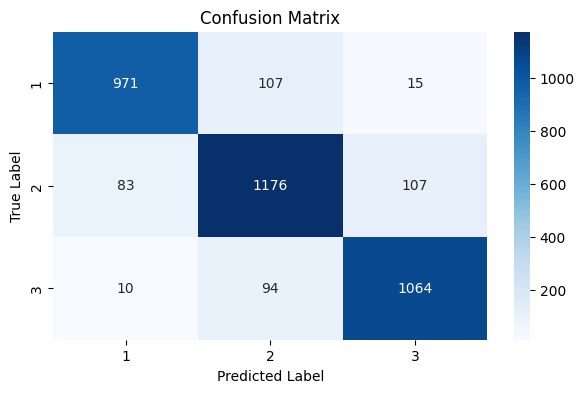

In [31]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print(classification_report(y_test, predictions2))

print("Accuracy: ", accuracy_score(y_test, predictions2))

conf_matrix = confusion_matrix(y_test, predictions2)

plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
%%sh
rm xgboost-model
rm model.tar.gz